# [Alexander Frederic]
# Programming Exercise \#4
---

# Preamble

In [1]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
/var/folders/41/3d45b9nn639g7t5rnlx8g0m40000gn/T/ipykernel_55224/3524984580.py:4: SyntaxWarning: invalid escape sequence '\ '
  '''


"\n# mount Google Drive in Google Colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# change directory using the magic command %cd\n### replace [MY PATH] below with your own path in Google Drive ###\n### %cd /content/drive/My\\ Drive/[MY PATH] ###\n"

In [1]:
# import relevant Python libraries

### Your import commands go here ###

import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

training_data = pd.read_csv('SenioritisTrainingData.csv')
test_data = pd.read_csv('SenioritisTestData.csv')


# **1. Machine Learning for Diagnosis of 'Senioritis'**

## Problem 1.1

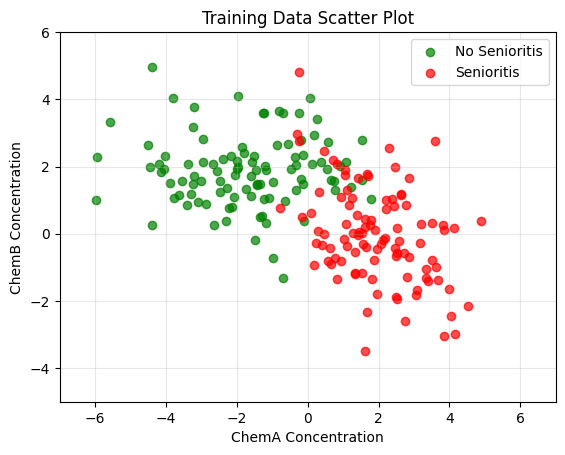

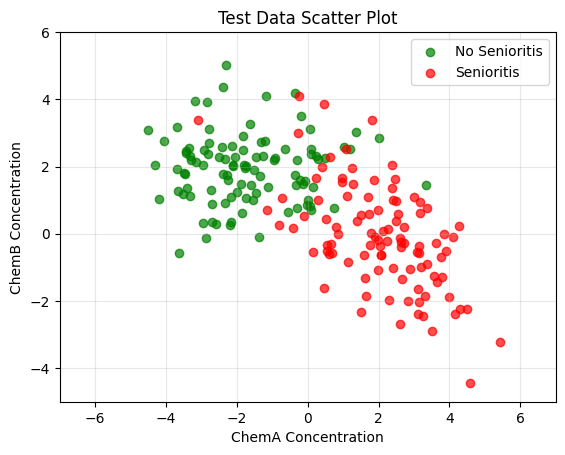

In [38]:
def plot_scatter(data, title):
    
    healthy = data[data['ClassLabel'] == 'No Senioritis']  
    senioritis = data[data['ClassLabel'] == 'Senioritis']  

    plt.scatter(healthy['ChemA'], healthy['ChemB'], color='green', label='No Senioritis', alpha=0.7)
    
    plt.scatter(senioritis['ChemA'], senioritis['ChemB'], color='red', label='Senioritis', alpha=0.7)

    plt.title(title)
    plt.xlabel('ChemA Concentration')
    plt.ylabel('ChemB Concentration')
    plt.xlim(-7, 7)  
    plt.ylim(-5, 6)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

plot_scatter(training_data, 'Training Data Scatter Plot')

plot_scatter(test_data, 'Test Data Scatter Plot')


## Problem 1.2

### (a)

In [39]:
import numpy as np

def train_lda(data):
    
    class0 = data[data['ClassLabel'] == 'No Senioritis'][['ChemA', 'ChemB']].values
    class1 = data[data['ClassLabel'] == 'Senioritis'][['ChemA', 'ChemB']].values

    mu0 = np.mean(class0, axis=0)
    mu1 = np.mean(class1, axis=0)

    cov0 = np.cov(class0, rowvar=False)
    cov1 = np.cov(class1, rowvar=False)
    shared_cov = (cov0 + cov1) / 2

    return mu0, mu1, shared_cov

def predict_lda(test_data, mu0, mu1, shared_cov):
    
    cov_inv = np.linalg.inv(shared_cov)

    w = np.dot(cov_inv, (mu1 - mu0))
    b = -0.5 * np.dot(np.dot((mu1 + mu0).T, cov_inv), (mu1 - mu0))

    X = test_data[['ChemA', 'ChemB']].values
    scores = np.dot(X, w) + b
    predictions = np.where(scores > 0, 'Senioritis', 'No Senioritis')

    return predictions

mu0, mu1, shared_cov = train_lda(training_data)

lda_predictions = predict_lda(test_data, mu0, mu1, shared_cov)

test_data['LDA_Predictions'] = lda_predictions
print(test_data[['ClassLabel', 'LDA_Predictions']])


        ClassLabel LDA_Predictions
0    No Senioritis   No Senioritis
1    No Senioritis      Senioritis
2    No Senioritis   No Senioritis
3    No Senioritis   No Senioritis
4    No Senioritis   No Senioritis
..             ...             ...
195     Senioritis      Senioritis
196     Senioritis      Senioritis
197     Senioritis   No Senioritis
198     Senioritis      Senioritis
199     Senioritis   No Senioritis

[200 rows x 2 columns]


### (b)

In [ ]:
### Your code for 1.2(b) goes here ###
def train_qda(data):
    
    class0 = data[data['ClassLabel'] == 'No Senioritis'][['ChemA', 'ChemB']].values
    class1 = data[data['ClassLabel'] == 'Senioritis'][['ChemA', 'ChemB']].values

    mu0 = np.mean(class0, axis=0)
    mu1 = np.mean(class1, axis=0)
    
    cov0 = np.cov(class0, rowvar=False)
    cov1 = np.cov(class1, rowvar=False)
 
    prior0 = len(class0) / len(data)
    prior1 = len(class1) / len(data)

    return mu0, mu1, cov0, cov1, prior0, prior1

def predict_qda(test_data, mu0, mu1, cov0, cov1, prior0, prior1):
   
    def qda_score(x, mu, cov, prior):
        cov_inv = np.linalg.inv(cov)
        cov_det = np.linalg.det(cov)
        diff = x - mu
        return -0.5 * np.log(cov_det) - 0.5 * np.dot(np.dot(diff.T, cov_inv), diff) + np.log(prior)

    X = test_data[['ChemA', 'ChemB']].values
  
    scores0 = np.array([qda_score(x, mu0, cov0, prior0) for x in X])
    scores1 = np.array([qda_score(x, mu1, cov1, prior1) for x in X])
  
    predictions = np.where(scores1 > scores0, 'Senioritis', 'No Senioritis')

    return predictions


mu0, mu1, cov0, cov1, prior0, prior1 = train_qda(training_data)

qda_predictions = predict_qda(test_data, mu0, mu1, cov0, cov1, prior0, prior1)

test_data['QDA_Predictions'] = qda_predictions
print(test_data[['ClassLabel', 'QDA_Predictions']])


        ClassLabel QDA_Predictions
0    No Senioritis   No Senioritis
1    No Senioritis      Senioritis
2    No Senioritis   No Senioritis
3    No Senioritis   No Senioritis
4    No Senioritis   No Senioritis
..             ...             ...
195     Senioritis      Senioritis
196     Senioritis      Senioritis
197     Senioritis   No Senioritis
198     Senioritis      Senioritis
199     Senioritis   No Senioritis

[200 rows x 2 columns]


### (c)

In [40]:
### Your code for 1.2(c) goes here ###
def train_gnb(data):
    # Separate classes
    class0 = data[data['ClassLabel'] == 'No Senioritis'][['ChemA', 'ChemB']].values
    class1 = data[data['ClassLabel'] == 'Senioritis'][['ChemA', 'ChemB']].values

    mu0 = np.mean(class0, axis=0)
    sigma0 = np.var(class0, axis=0)  
    mu1 = np.mean(class1, axis=0)
    sigma1 = np.var(class1, axis=0)  

    prior0 = len(class0) / len(data)
    prior1 = len(class1) / len(data)

    return mu0, sigma0, mu1, sigma1, prior0, prior1

def predict_gnb(test_data, mu0, sigma0, mu1, sigma1, prior0, prior1):
    def gaussian_likelihood(x, mu, sigma):
        return (1 / np.sqrt(2 * np.pi * sigma)) * np.exp(-((x - mu) ** 2) / (2 * sigma))

    X = test_data[['ChemA', 'ChemB']].values
    likelihoods0 = np.prod(gaussian_likelihood(X, mu0, sigma0), axis=1) * prior0
    likelihoods1 = np.prod(gaussian_likelihood(X, mu1, sigma1), axis=1) * prior1

    predictions = np.where(likelihoods1 > likelihoods0, 'Senioritis', 'No Senioritis')

    return predictions

mu0, sigma0, mu1, sigma1, prior0, prior1 = train_gnb(training_data)

gnb_predictions = predict_gnb(test_data, mu0, sigma0, mu1, sigma1, prior0, prior1)

test_data['GNB_Predictions'] = gnb_predictions
print(test_data[['ClassLabel', 'GNB_Predictions']])


        ClassLabel GNB_Predictions
0    No Senioritis   No Senioritis
1    No Senioritis      Senioritis
2    No Senioritis   No Senioritis
3    No Senioritis   No Senioritis
4    No Senioritis   No Senioritis
..             ...             ...
195     Senioritis      Senioritis
196     Senioritis      Senioritis
197     Senioritis   No Senioritis
198     Senioritis      Senioritis
199     Senioritis   No Senioritis

[200 rows x 2 columns]


### (d)

In [42]:
### Your code for 1.2(d) goes here ###
from collections import Counter

def euclidean_distance(x1, x2):
    """Compute the Euclidean distance between two points."""
    return np.sqrt(np.sum((x1 - x2) ** 2))

def predict_knn(training_data, test_data, k=3):
    """Classify test points using k-NN."""
    train_X = training_data[['ChemA', 'ChemB']].values
    train_y = training_data['ClassLabel'].values

    test_X = test_data[['ChemA', 'ChemB']].values

    predictions = []

    for test_point in test_X:
        distances = [euclidean_distance(test_point, train_point) for train_point in train_X]

        neighbor_indices = np.argsort(distances)[:k]
        neighbor_labels = train_y[neighbor_indices]

        most_common = Counter(neighbor_labels).most_common(1)[0][0]
        predictions.append(most_common)

    return predictions

knn_predictions = predict_knn(training_data, test_data, k=3)

test_data['kNN_Predictions'] = knn_predictions
print(test_data[['ClassLabel', 'kNN_Predictions']])


        ClassLabel kNN_Predictions
0    No Senioritis   No Senioritis
1    No Senioritis      Senioritis
2    No Senioritis   No Senioritis
3    No Senioritis   No Senioritis
4    No Senioritis   No Senioritis
..             ...             ...
195     Senioritis      Senioritis
196     Senioritis      Senioritis
197     Senioritis   No Senioritis
198     Senioritis      Senioritis
199     Senioritis      Senioritis

[200 rows x 2 columns]


## Problem 1.3

### (a)

In [34]:
def compute_error_rate(test_data, prediction_column):
    """Compute the error rate for a classifier."""
    y_true = test_data['ClassLabel']
    y_pred = test_data[prediction_column]
    error_rate = sum(y_true != y_pred) / len(y_true)
    return error_rate

lda_error_rate = compute_error_rate(test_data, 'LDA_Predictions')
qda_error_rate = compute_error_rate(test_data, 'QDA_Predictions')
gnb_error_rate = compute_error_rate(test_data, 'GNB_Predictions')
knn_error_rate = compute_error_rate(test_data, 'kNN_Predictions')

print("Error Rates:")
print(f"LDA: {lda_error_rate:.4f}")
print(f"QDA: {qda_error_rate:.4f}")
print(f"GNB: {gnb_error_rate:.4f}")
print(f"k-NN: {knn_error_rate:.4f}")


Error Rates:
LDA: 0.0850
QDA: 0.0900
GNB: 0.0850
k-NN: 0.0950


### (b)

In [43]:
### Your code for 1.3(b) goes here ###
def compute_tp_tpr(test_data, prediction_column):
    """Compute True Positives (TP) and True Positive Rate (TPR)."""
    y_true = test_data['ClassLabel']
    y_pred = test_data[prediction_column]
    TP = sum((y_true == 'Senioritis') & (y_pred == 'Senioritis'))
    total_senioritis = sum(y_true == 'Senioritis')
    TPR = TP / total_senioritis
    return TP, TPR

lda_tp_tpr = compute_tp_tpr(test_data, 'LDA_Predictions')
qda_tp_tpr = compute_tp_tpr(test_data, 'QDA_Predictions')
gnb_tp_tpr = compute_tp_tpr(test_data, 'GNB_Predictions')
knn_tp_tpr = compute_tp_tpr(test_data, 'kNN_Predictions')

print("TP and TPR:")
print(f"LDA: TP = {lda_tp_tpr[0]}, TPR = {lda_tp_tpr[1]:.4f}")
print(f"QDA: TP = {qda_tp_tpr[0]}, TPR = {qda_tp_tpr[1]:.4f}")
print(f"GNB: TP = {gnb_tp_tpr[0]}, TPR = {gnb_tp_tpr[1]:.4f}")
print(f"k-NN: TP = {knn_tp_tpr[0]}, TPR = {knn_tp_tpr[1]:.4f}")



TP and TPR:
LDA: TP = 89, TPR = 0.8900
QDA: TP = 88, TPR = 0.8800
GNB: TP = 86, TPR = 0.8600
k-NN: TP = 91, TPR = 0.9100


### (c)

In [44]:
### Your code for 1.3(c) goes here ###
def compute_fp_fpr(test_data, prediction_column):
    """Compute False Positives (FP) and False Positive Rate (FPR)."""
    y_true = test_data['ClassLabel']
    y_pred = test_data[prediction_column]
    FP = sum((y_true == 'No Senioritis') & (y_pred == 'Senioritis'))
    total_no_senioritis = sum(y_true == 'No Senioritis')
    FPR = FP / total_no_senioritis
    return FP, FPR

lda_fp_fpr = compute_fp_fpr(test_data, 'LDA_Predictions')
qda_fp_fpr = compute_fp_fpr(test_data, 'QDA_Predictions')
gnb_fp_fpr = compute_fp_fpr(test_data, 'GNB_Predictions')
knn_fp_fpr = compute_fp_fpr(test_data, 'kNN_Predictions')

print("FP and FPR:")
print(f"LDA: FP = {lda_fp_fpr[0]}, FPR = {lda_fp_fpr[1]:.4f}")
print(f"QDA: FP = {qda_fp_fpr[0]}, FPR = {qda_fp_fpr[1]:.4f}")
print(f"GNB: FP = {gnb_fp_fpr[0]}, FPR = {gnb_fp_fpr[1]:.4f}")
print(f"k-NN: FP = {knn_fp_fpr[0]}, FPR = {knn_fp_fpr[1]:.4f}")


FP and FPR:
LDA: FP = 6, FPR = 0.0600
QDA: FP = 6, FPR = 0.0600
GNB: FP = 3, FPR = 0.0300
k-NN: FP = 10, FPR = 0.1000


### (d)

In [45]:
### Your code for 1.3(d) goes here ###
def compute_tn_tnr(test_data, prediction_column):
    """Compute True Negatives (TN) and True Negative Rate (TNR)."""
    y_true = test_data['ClassLabel']
    y_pred = test_data[prediction_column]
    TN = sum((y_true == 'No Senioritis') & (y_pred == 'No Senioritis'))
    total_no_senioritis = sum(y_true == 'No Senioritis')
    TNR = TN / total_no_senioritis
    return TN, TNR

lda_tn_tnr = compute_tn_tnr(test_data, 'LDA_Predictions')
qda_tn_tnr = compute_tn_tnr(test_data, 'QDA_Predictions')
gnb_tn_tnr = compute_tn_tnr(test_data, 'GNB_Predictions')
knn_tn_tnr = compute_tn_tnr(test_data, 'kNN_Predictions')

print("TN and TNR:")
print(f"LDA: TN = {lda_tn_tnr[0]}, TNR = {lda_tn_tnr[1]:.4f}")
print(f"QDA: TN = {qda_tn_tnr[0]}, TNR = {qda_tn_tnr[1]:.4f}")
print(f"GNB: TN = {gnb_tn_tnr[0]}, TNR = {gnb_tn_tnr[1]:.4f}")
print(f"k-NN: TN = {knn_tn_tnr[0]}, TNR = {knn_tn_tnr[1]:.4f}")


TN and TNR:
LDA: TN = 94, TNR = 0.9400
QDA: TN = 94, TNR = 0.9400
GNB: TN = 97, TNR = 0.9700
k-NN: TN = 90, TNR = 0.9000


### (e)

In [46]:
### Your code for 1.3(e) goes here ###
def compute_fn_fnr(test_data, prediction_column):
    """Compute False Negatives (FN) and False Negative Rate (FNR)."""
    y_true = test_data['ClassLabel']
    y_pred = test_data[prediction_column]
    FN = sum((y_true == 'Senioritis') & (y_pred == 'No Senioritis'))
    total_senioritis = sum(y_true == 'Senioritis')
    FNR = FN / total_senioritis
    return FN, FNR

lda_fn_fnr = compute_fn_fnr(test_data, 'LDA_Predictions')
qda_fn_fnr = compute_fn_fnr(test_data, 'QDA_Predictions')
gnb_fn_fnr = compute_fn_fnr(test_data, 'GNB_Predictions')
knn_fn_fnr = compute_fn_fnr(test_data, 'kNN_Predictions')

print("FN and FNR:")
print(f"LDA: FN = {lda_fn_fnr[0]}, FNR = {lda_fn_fnr[1]:.4f}")
print(f"QDA: FN = {qda_fn_fnr[0]}, FNR = {qda_fn_fnr[1]:.4f}")
print(f"GNB: FN = {gnb_fn_fnr[0]}, FNR = {gnb_fn_fnr[1]:.4f}")
print(f"k-NN: FN = {knn_fn_fnr[0]}, FNR = {knn_fn_fnr[1]:.4f}")


FN and FNR:
LDA: FN = 11, FNR = 0.1100
QDA: FN = 12, FNR = 0.1200
GNB: FN = 14, FNR = 0.1400
k-NN: FN = 9, FNR = 0.0900


## Problem 1.4

_[I recommend LDA because it offers a better balance between correctly identifying Senioritis (TPR = 0.8900) and avoiding misclassification of healthy students (FPR = 0.0600), while maintaining a low error rate (0.0850)]_

## Problem 1.5

### (a)

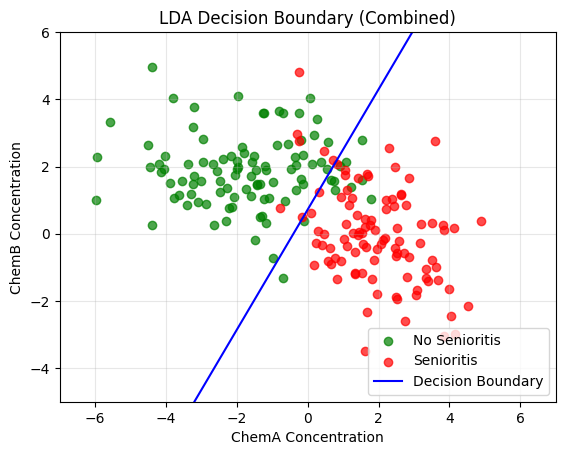

In [47]:
### Your code for 1.5(a) goes here ###

def plot_lda_combined(data, title, mu0, mu1, shared_cov):
   
    healthy = data[data['ClassLabel'] == 'No Senioritis']
    senioritis = data[data['ClassLabel'] == 'Senioritis']

    plt.scatter(healthy['ChemA'], healthy['ChemB'], color='green', label='No Senioritis', alpha=0.7)
    plt.scatter(senioritis['ChemA'], senioritis['ChemB'], color='red', label='Senioritis', alpha=0.7)

    cov_inv = np.linalg.inv(shared_cov)
    w = np.dot(cov_inv, (mu1 - mu0))
    b = -0.5 * np.dot(np.dot((mu1 + mu0).T, cov_inv), (mu1 - mu0))

    x_vals = np.linspace(data['ChemA'].min() - 1, data['ChemA'].max() + 1, 100)
    y_vals = -w[0] / w[1] * x_vals - b / w[1]  # Solve for y

    plt.plot(x_vals, y_vals, color='blue', label='Decision Boundary')

    plt.title(title)
    plt.xlabel('ChemA Concentration')
    plt.ylabel('ChemB Concentration')
    plt.xlim(-7, 7)  
    plt.ylim(-5, 6)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

mu0, mu1, shared_cov = train_lda(training_data)

plot_lda_combined(training_data, 'LDA Decision Boundary (Combined)', mu0, mu1, shared_cov)


### (b)

/var/folders/41/3d45b9nn639g7t5rnlx8g0m40000gn/T/ipykernel_64397/4289148090.py:27: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, decision_boundary, levels=[0], colors='blue', linewidths=2, label='Decision Boundary')


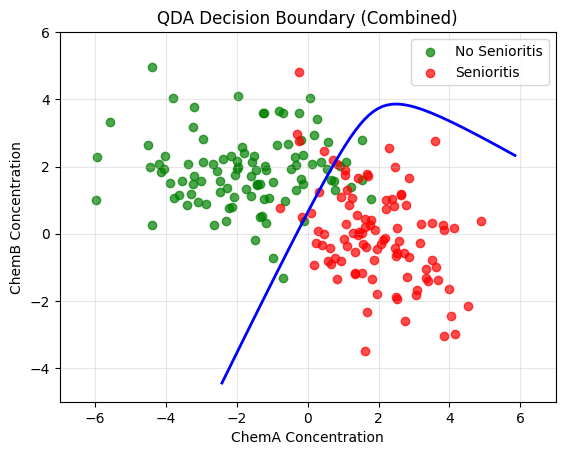

In [48]:
### Your code for 1.5(b) goes here ###

def plot_qda_combined(data, title, mu0, mu1, cov0, cov1, prior0, prior1):
    
    healthy = data[data['ClassLabel'] == 'No Senioritis']
    senioritis = data[data['ClassLabel'] == 'Senioritis']
  
    plt.scatter(healthy['ChemA'], healthy['ChemB'], color='green', label='No Senioritis', alpha=0.7)
    plt.scatter(senioritis['ChemA'], senioritis['ChemB'], color='red', label='Senioritis', alpha=0.7)
 
    x_vals = np.linspace(data['ChemA'].min() - 1, data['ChemA'].max() + 1, 100)
    y_vals = np.linspace(data['ChemB'].min() - 1, data['ChemB'].max() + 1, 100)
    xx, yy = np.meshgrid(x_vals, y_vals)
    grid_points = np.c_[xx.ravel(), yy.ravel()]
  
    def qda_score(x, mu, cov, prior):
        cov_inv = np.linalg.inv(cov)
        cov_det = np.linalg.det(cov)
        diff = x - mu
        return -0.5 * np.dot(np.dot(diff.T, cov_inv), diff) - 0.5 * np.log(cov_det) + np.log(prior)

    scores0 = np.array([qda_score(point, mu0, cov0, prior0) for point in grid_points])
    scores1 = np.array([qda_score(point, mu1, cov1, prior1) for point in grid_points])

    decision_boundary = (scores1 - scores0).reshape(xx.shape)

    plt.contour(xx, yy, decision_boundary, levels=[0], colors='blue', linewidths=2, label='Decision Boundary')

    plt.title(title)
    plt.xlabel('ChemA Concentration')
    plt.ylabel('ChemB Concentration')
    plt.xlim(-7, 7)
    plt.ylim(-5, 6)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

mu0, mu1, cov0, cov1, prior0, prior1 = train_qda(training_data)

plot_qda_combined(training_data, 'QDA Decision Boundary (Combined)', mu0, mu1, cov0, cov1, prior0, prior1)


### (c)

/var/folders/41/3d45b9nn639g7t5rnlx8g0m40000gn/T/ipykernel_64397/1006743355.py:24: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, decision_boundary, levels=[0], colors='blue', linewidths=2, label='Decision Boundary')


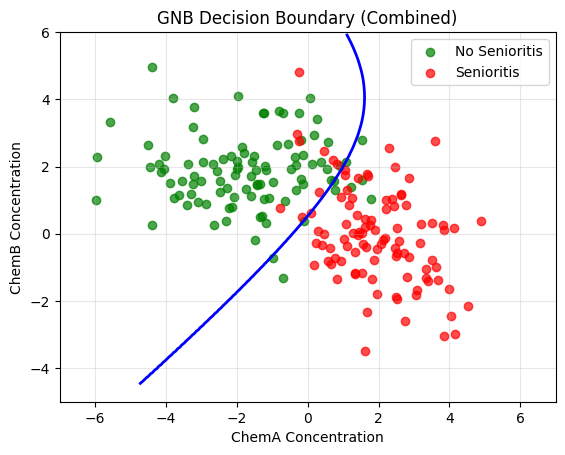

In [49]:
### Your code for 1.5(c) goes here ###

def plot_gnb_combined(data, title, mu0, sigma0, mu1, sigma1, prior0, prior1):
    
    healthy = data[data['ClassLabel'] == 'No Senioritis']
    senioritis = data[data['ClassLabel'] == 'Senioritis']

    plt.scatter(healthy['ChemA'], healthy['ChemB'], color='green', label='No Senioritis', alpha=0.7)
    plt.scatter(senioritis['ChemA'], senioritis['ChemB'], color='red', label='Senioritis', alpha=0.7)

    x_vals = np.linspace(data['ChemA'].min() - 1, data['ChemA'].max() + 1, 100)
    y_vals = np.linspace(data['ChemB'].min() - 1, data['ChemB'].max() + 1, 100)
    xx, yy = np.meshgrid(x_vals, y_vals)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    def gaussian_likelihood(x, mu, sigma):
        return (1 / np.sqrt(2 * np.pi * sigma)) * np.exp(-((x - mu) ** 2) / (2 * sigma))

    likelihoods0 = np.prod(gaussian_likelihood(grid_points, mu0, sigma0), axis=1) * prior0
    likelihoods1 = np.prod(gaussian_likelihood(grid_points, mu1, sigma1), axis=1) * prior1

    decision_boundary = (likelihoods1 - likelihoods0).reshape(xx.shape)

    plt.contour(xx, yy, decision_boundary, levels=[0], colors='blue', linewidths=2, label='Decision Boundary')

    plt.title(title)
    plt.xlabel('ChemA Concentration')
    plt.ylabel('ChemB Concentration')
    plt.xlim(-7, 7)
    plt.ylim(-5, 6)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

mu0, sigma0, mu1, sigma1, prior0, prior1 = train_gnb(training_data)

plot_gnb_combined(training_data, 'GNB Decision Boundary (Combined)', mu0, sigma0, mu1, sigma1, prior0, prior1)


### (d)

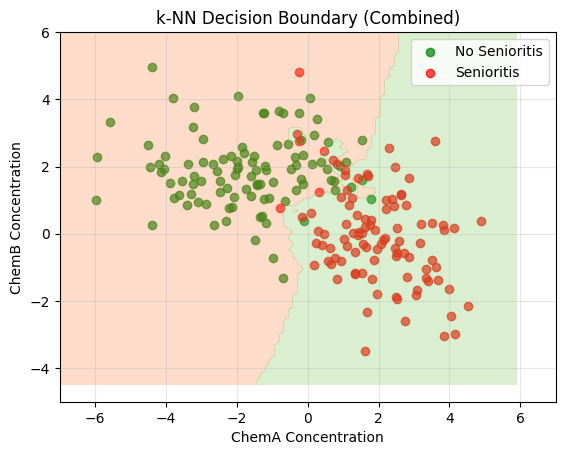

In [50]:
### Your code for 1.5(d) goes here ###
from collections import Counter

def plot_knn_combined(data, title, k=3):
 
    healthy = data[data['ClassLabel'] == 'No Senioritis']
    senioritis = data[data['ClassLabel'] == 'Senioritis']

    plt.scatter(healthy['ChemA'], healthy['ChemB'], color='green', label='No Senioritis', alpha=0.7)
    plt.scatter(senioritis['ChemA'], senioritis['ChemB'], color='red', label='Senioritis', alpha=0.7)

    x_vals = np.linspace(data['ChemA'].min() - 1, data['ChemA'].max() + 1, 100)
    y_vals = np.linspace(data['ChemB'].min() - 1, data['ChemB'].max() + 1, 100)
    xx, yy = np.meshgrid(x_vals, y_vals)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    def knn_predict_point(point, train_X, train_y, k):
        
        distances = [np.sqrt(np.sum((point - train_point) ** 2)) for train_point in train_X]
        
        neighbor_indices = np.argsort(distances)[:k]
        neighbor_labels = train_y[neighbor_indices]
        
        most_common = Counter(neighbor_labels).most_common(1)[0][0]
        return most_common

    train_X = data[['ChemA', 'ChemB']].values
    train_y = data['ClassLabel'].values

    knn_predictions = np.array([
        knn_predict_point(point, train_X, train_y, k) for point in grid_points
    ])

    decision_boundary = (knn_predictions == 'Senioritis').reshape(xx.shape)

    plt.contourf(xx, yy, decision_boundary, alpha=0.3, cmap='RdYlGn')
    plt.title(title)
    plt.xlabel('ChemA Concentration')
    plt.ylabel('ChemB Concentration')
    plt.xlim(-7, 7)
    plt.ylim(-5, 6)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

plot_knn_combined(training_data, 'k-NN Decision Boundary (Combined)', k=3)


### (e)

/var/folders/41/3d45b9nn639g7t5rnlx8g0m40000gn/T/ipykernel_64397/617052335.py:32: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, decision_boundary, levels=[0], colors='blue', linewidths=2, label='Decision Boundary')


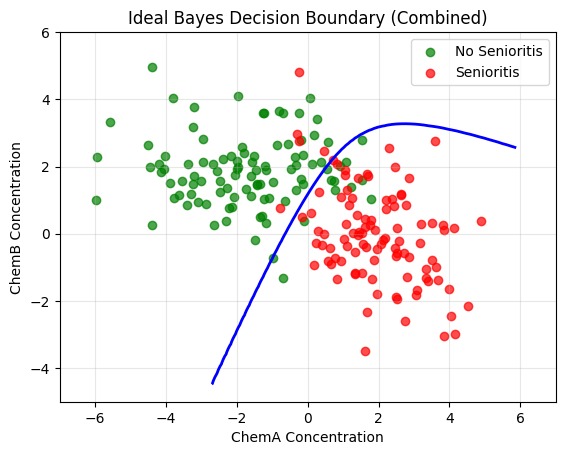

In [51]:
### Your code for 1.5(e) goes here ###

def plot_bayes_combined(data, title):
    healthy = data[data['ClassLabel'] == 'No Senioritis']
    senioritis = data[data['ClassLabel'] == 'Senioritis']

    plt.scatter(healthy['ChemA'], healthy['ChemB'], color='green', label='No Senioritis', alpha=0.7)
    plt.scatter(senioritis['ChemA'], senioritis['ChemB'], color='red', label='Senioritis', alpha=0.7)

    mu0 = np.array([-2, 2])  
    cov0 = np.array([[3, 0], [0, 1]]) 
    mu1 = np.array([2, 0])  
    cov1 = np.array([[2, -1], [-1, 2]])  

    x_vals = np.linspace(data['ChemA'].min() - 1, data['ChemA'].max() + 1, 100)
    y_vals = np.linspace(data['ChemB'].min() - 1, data['ChemB'].max() + 1, 100)
    xx, yy = np.meshgrid(x_vals, y_vals)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    def gaussian_probability(x, mu, cov):
        cov_inv = np.linalg.inv(cov)
        cov_det = np.linalg.det(cov)
        diff = x - mu
        exponent = -0.5 * np.dot(np.dot(diff.T, cov_inv), diff)
        return np.exp(exponent) / np.sqrt((2 * np.pi) ** len(mu) * cov_det)

    prob0 = np.array([gaussian_probability(point, mu0, cov0) for point in grid_points])
    prob1 = np.array([gaussian_probability(point, mu1, cov1) for point in grid_points])

    decision_boundary = (prob1 - prob0).reshape(xx.shape)

    plt.contour(xx, yy, decision_boundary, levels=[0], colors='blue', linewidths=2, label='Decision Boundary')
    plt.title(title)
    plt.xlabel('ChemA Concentration')
    plt.ylabel('ChemB Concentration')
    plt.xlim(-7, 7)
    plt.ylim(-5, 6)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

plot_bayes_combined(training_data, 'Ideal Bayes Decision Boundary (Combined)')


## Problem 1.6


### (a)

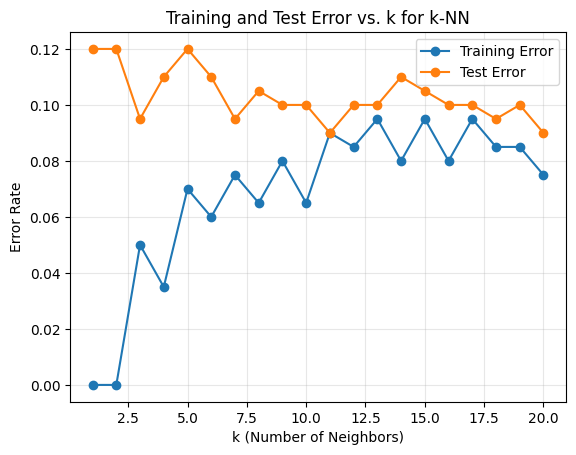

In [52]:
### Your code for 1.6(a) goes here ###

from collections import Counter

def knn_predict(data, train_X, train_y, k):
    """
    Predict the class for each data point using k-NN.
    """
    predictions = []
    for point in data:
        # Compute distances to all training points
        distances = [np.sqrt(np.sum((point - train_point) ** 2)) for train_point in train_X]
        # Find the k nearest neighbors
        neighbor_indices = np.argsort(distances)[:k]
        neighbor_labels = train_y[neighbor_indices]
        # Perform majority voting
        most_common = Counter(neighbor_labels).most_common(1)[0][0]
        predictions.append(most_common)
    return predictions

def compute_knn_error(data, features, labels, train_X, train_y, k):
    """
    Compute k-NN error rate for a given value of k.
    """
    predictions = knn_predict(data[features].values, train_X, train_y, k)
    error_rate = np.mean(predictions != data[labels].values)
    return error_rate

train_X = training_data[['ChemA', 'ChemB']].values
train_y = training_data['ClassLabel'].values
test_X = test_data[['ChemA', 'ChemB']].values
test_y = test_data['ClassLabel'].values

k_values = range(1, 21)

training_errors = []
test_errors = []

for k in k_values:
    train_error = compute_knn_error(training_data, ['ChemA', 'ChemB'], 'ClassLabel', train_X, train_y, k)
    test_error = compute_knn_error(test_data, ['ChemA', 'ChemB'], 'ClassLabel', train_X, train_y, k)
    training_errors.append(train_error)
    test_errors.append(test_error)

import matplotlib.pyplot as plt

plt.plot(k_values, training_errors, label='Training Error', marker='o')
plt.plot(k_values, test_errors, label='Test Error', marker='o')

plt.title('Training and Test Error vs. k for k-NN')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



### (b)

_[For k = 11 since the test error rate and the training error rate is almost exactly the same meaning it isn't over or underfitted.]_